In [1]:
import pandas as pd

In [3]:
truck = pd.read_csv(r"C:\Users\KL-USER\Desktop\KL Projects\Trucking\Trial\trucking_dummy.csv")

In [7]:
truck.head(10)

,truckID,driverID,driverExp,routeKm,Speed,latitude,longitude,isfoggy,israiny,iswindy,violations
0,102,25,2342,300,50,-53.081810,73.504158,0,0,1,0
1,38,12,3233,400,45,15.199999,-86.241905,0,0,0,0
2,99,10,1237,210,75,45.100000,15.200000,1,1,1,1
3,54,22,434,70,85,18.971187,-72.285215,1,1,0,1
4,34,30,800,100,72,47.162494,19.503304,1,0,0,0
5,15,31,2323,350,66,-0.789275,113.921327,0,1,0,0
6,29,32,2890,375,34,53.412910,-8.243890,1,1,0,0
7,106,21,932,90,55,31.046051,34.851612,0,1,1,1
8,60,27,342,40,45,54.236107,-4.548056,1,1,1,1
9,40,14,744,120,76,20.593684,78.962880,1,0,1,1


In [5]:
col = ["Unnamed: 11", "Unnamed: 12", "Unnamed: 13"]
truck.drop(col, axis=1, inplace=True)

In [8]:
truck.head(10)

,truckID,driverID,driverExp,routeKm,Speed,latitude,longitude,isfoggy,israiny,iswindy,violations
0,102,25,2342,300,50,-53.081810,73.504158,0,0,1,0
1,38,12,3233,400,45,15.199999,-86.241905,0,0,0,0
2,99,10,1237,210,75,45.100000,15.200000,1,1,1,1
3,54,22,434,70,85,18.971187,-72.285215,1,1,0,1
4,34,30,800,100,72,47.162494,19.503304,1,0,0,0
5,15,31,2323,350,66,-0.789275,113.921327,0,1,0,0
6,29,32,2890,375,34,53.412910,-8.243890,1,1,0,0
7,106,21,932,90,55,31.046051,34.851612,0,1,1,1
8,60,27,342,40,45,54.236107,-4.548056,1,1,1,1
9,40,14,744,120,76,20.593684,78.962880,1,0,1,1


In [9]:
corr = truck.corr()

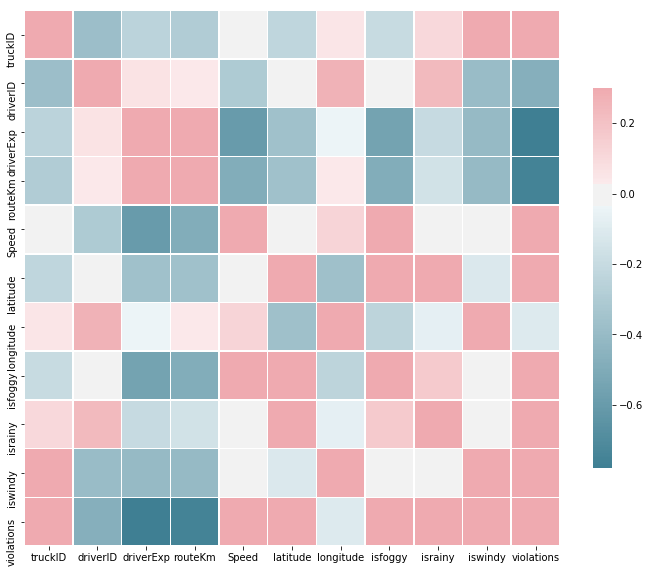

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})

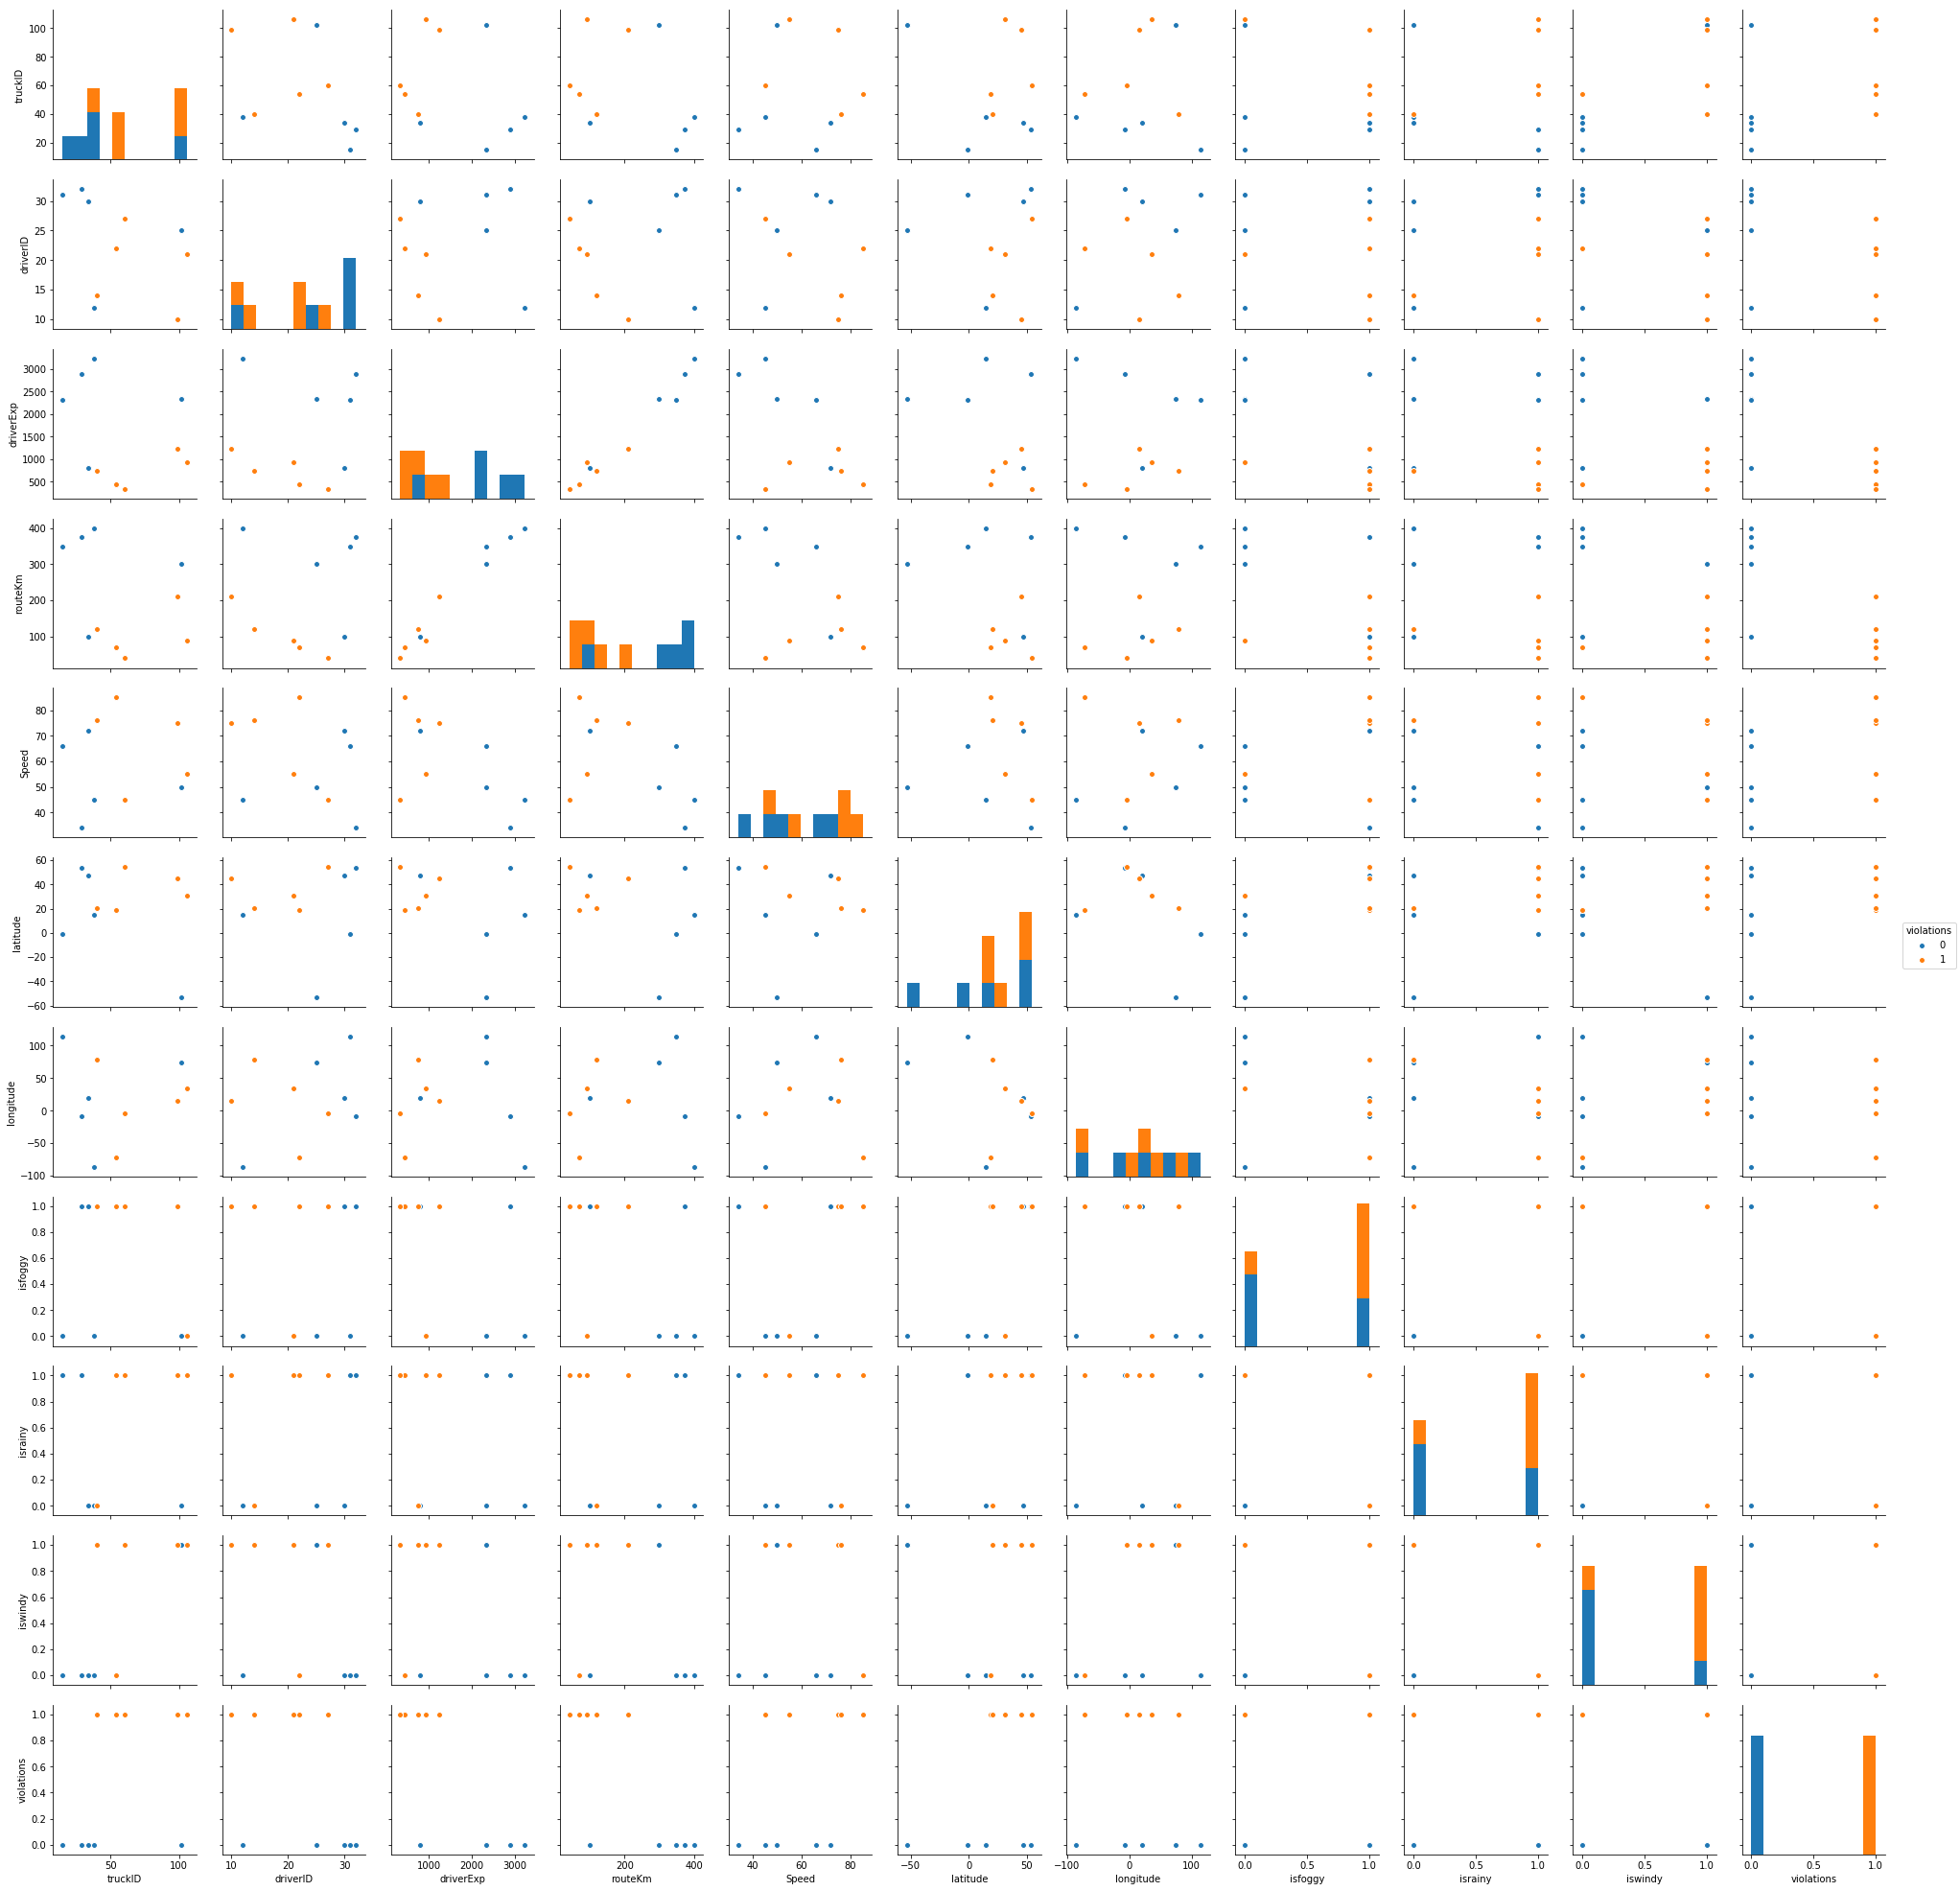

In [13]:
sns.pairplot(truck, hue='violations', size=2.5);
plt.show()

In [14]:
correlation = corr["violations"]

In [16]:
correlation.head(10)

truckID      0.447448
driverID    -0.470117
driverExp   -0.780411
routeKm     -0.754476
Speed        0.433277
latitude     0.351008
longitude   -0.099769
isfoggy      0.408248
israiny      0.408248
iswindy      0.600000
Name: violations, dtype: float64

In [23]:
col = ["driverExp", "routeKm", "Speed", "isfoggy", "israiny", "iswindy"]
features = truck[col]
target = truck["violations"]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold

C:\Users\KL-USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
import numpy as np
mse_values = []
kf = KFold(n=len(truck), n_folds=5, shuffle=True, random_state=3)
for train_index, test_index in kf:
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)
avg_mse = np.mean(mse_values)

In [32]:
avg_mse

0.3